## AlekseevDP(DSU-4, DLL-15)_HW#1_Perceptron_Linear Regression.
Задание: Реализовать обучение линейной регрессии для задачи boston house prices (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices) с использованием PyTorch.

 Boston house prices, columns description:

- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS proportion of non-retail business acres per town 
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX nitric oxides concentration (parts per 10 million) 
- RM average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS weighted distances to five Boston employment centres 
- RAD index of accessibility to radial highways 
- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town 
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT % lower status of the population 
- MEDV Median value of owner-occupied homes in $1000's

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


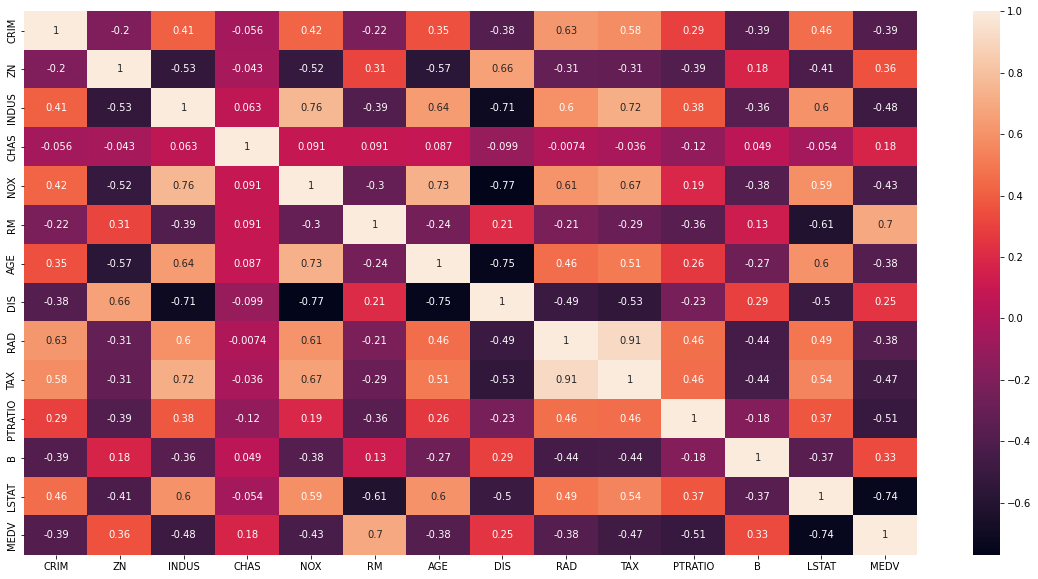

In [10]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Мы можем видеть, что ряд входящих признаков сильно коррелируют с целевой переменной (стоимость недвижимости - 'MEDV'), как прямо пропорционально (+), так и обратно пропорционально (-). ***Примечание: Для упрощения модели регрессии сперва были оставлены только признаки с корреляцией более 0.5 по модулю ('RM', 'PTRATIO', 'LSTAT'), но качество предсказаний получилось невысоким. Поэтому в итоге решил оставить все входящие признаки.

In [128]:
# features =  ['RM', 'PTRATIO', 'LSTAT']
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [129]:
# входящие признаки
X = df.loc[:, features]

In [130]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [131]:
# целевая переменная
Y = df['MEDV']

In [132]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [24]:
# отнормируем входящие признаки StandardScaler'ом
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

In [134]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [135]:
# преобразуем целевую переменную также в массив NumPy (для входящих признаков это не требуется, т.к. скейлер выдал уже "правильный" массив numpy)
Y.to_numpy()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [136]:
# разобьем данные на трейн- и тест-выборку
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=21)

In [138]:
# посмотрим на размерности выборок
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## Теперь всё готово к построению модели лин.регрессии. Загрузим PyTorch

In [47]:
import torch
print(torch.__version__)

1.12.1+cu113


In [139]:
# Преобразуем данные из массивов Numpy в тензоры Torch [для "Y_test" пришлось сделать ещё раз "to_numpy", иначе выдавал ошибку]
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test.to_numpy(), dtype=torch.float).view(-1, 1)

In [140]:
# количество входящих признаков
X_train.shape[1]

13

In [141]:
# определим нейронную сеть с одним нейроном, этого будет достаточно для построения лин.регрессии
w_num = X_train.shape[1] # 13 входов
net = torch.nn.Sequential(
    torch.nn.Linear(w_num, 1) # 1 выход 
)

torch.nn.init.normal_(net[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [147]:
#  создадим обучающие наборы данных
datasets = torch.utils.data.TensorDataset(X_train, Y_train)

In [159]:
# теперь создадим загрузчик данных, который вернет итератор для пошагового ("побатчевого") обучения модели
train_iter = torch.utils.data.DataLoader(datasets, batch_size=5, shuffle=True)

In [149]:
# в качестве минимизируемой функции потерь возьмем функцию расчета среднеквадратичной ошибки (Mean Squared Error)
loss = torch.nn.MSELoss()

In [150]:
# в качестве метода оптимизации возьмем стохастический градиентный спуск,
# Learning Rate = 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

In [160]:
# обучим модель на 1000 эпохах. Если ошибка снизится ниже уровня 0.5, то остановим обучение
num_epochs = 1000
for epoch in range(num_epochs):
    for x, y in train_iter:
        output = net(x)
        l = loss(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, l.item()))

    if l.item() < 0.5:
        break

epoch 1 loss: 26.8912
epoch 2 loss: 29.0196
epoch 3 loss: 3.5982
epoch 4 loss: 18.6414
epoch 5 loss: 23.2696
epoch 6 loss: 19.5012
epoch 7 loss: 6.2867
epoch 8 loss: 14.9574
epoch 9 loss: 28.0326
epoch 10 loss: 89.0053
epoch 11 loss: 44.9069
epoch 12 loss: 15.4772
epoch 13 loss: 0.9424
epoch 14 loss: 15.5790
epoch 15 loss: 53.0416
epoch 16 loss: 11.3162
epoch 17 loss: 15.7270
epoch 18 loss: 3.4986
epoch 19 loss: 5.1574
epoch 20 loss: 34.4688
epoch 21 loss: 5.4836
epoch 22 loss: 9.4659
epoch 23 loss: 41.8382
epoch 24 loss: 9.2666
epoch 25 loss: 37.1646
epoch 26 loss: 2.7756
epoch 27 loss: 68.8813
epoch 28 loss: 41.1487
epoch 29 loss: 14.6892
epoch 30 loss: 4.7519
epoch 31 loss: 13.6093
epoch 32 loss: 10.5952
epoch 33 loss: 24.8295
epoch 34 loss: 5.3506
epoch 35 loss: 9.2662
epoch 36 loss: 21.2340
epoch 37 loss: 1.6683
epoch 38 loss: 49.7750
epoch 39 loss: 45.5704
epoch 40 loss: 30.5531
epoch 41 loss: 21.8532
epoch 42 loss: 7.1946
epoch 43 loss: 36.3031
epoch 44 loss: 45.1576
epoch 45 lo

## Проверим теперь качество предсказаний на тестовой выборке.

In [161]:
print(loss(net(X_test), Y_test).item())

27.428171157836914


## На тестовой выборке значение лосс-функции значительно выше полученного на трейн-. А что с конкретными предсказаниями?

In [164]:
for i in range(X_test.shape[0]):
  print("i = ", i, net(X_test[i]).data, Y_test[i])

i =  0 tensor([18.4944]) tensor([14.1000])
i =  1 tensor([15.8399]) tensor([13.4000])
i =  2 tensor([25.5971]) tensor([22.1000])
i =  3 tensor([39.2371]) tensor([41.7000])
i =  4 tensor([32.5865]) tensor([28.5000])
i =  5 tensor([12.6248]) tensor([13.6000])
i =  6 tensor([22.5670]) tensor([23.1000])
i =  7 tensor([31.3777]) tensor([23.])
i =  8 tensor([30.4532]) tensor([31.6000])
i =  9 tensor([17.8843]) tensor([16.])
i =  10 tensor([23.0995]) tensor([18.9000])
i =  11 tensor([18.4660]) tensor([8.5000])
i =  12 tensor([26.5431]) tensor([23.3000])
i =  13 tensor([13.0556]) tensor([7.2000])
i =  14 tensor([21.0207]) tensor([18.4000])
i =  15 tensor([24.6865]) tensor([25.])
i =  16 tensor([19.5346]) tensor([13.4000])
i =  17 tensor([28.7440]) tensor([23.6000])
i =  18 tensor([4.5669]) tensor([14.4000])
i =  19 tensor([16.8349]) tensor([17.8000])
i =  20 tensor([20.8558]) tensor([18.7000])
i =  21 tensor([22.6369]) tensor([19.4000])
i =  22 tensor([22.1643]) tensor([15.2000])
i =  23 tenso

## Мы видим, что модель на тестовой выборке предсказывает цену недвижимости в целом близко к реальным значениям, хотя иногда случаются сильные выбросы.